In [ ]:
# https://matplotlib.org/stable/gallery/mplot3d/voxels_numpy_logo.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [2]:
def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

In [3]:
img = cv2.imread('pngs/output_000.png')

In [4]:
x , y, z = img.shape

In [5]:
img.shape

(103, 103, 3)

In [6]:
n_voxels = np.zeros((10, 10, 10), dtype=bool)

In [7]:
# build up the numpy logo
# n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, 0] = True
# n_voxels[-1, 0, :] = True
# n_voxels[1, 0, 2] = True
# n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

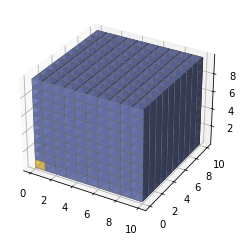

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)

plt.show()